## 1. Downloading data


In [1]:
from utils.download_dataset import download_and_extract_zip

In [2]:
bulldozer_dataset_path = download_and_extract_zip(
    source="https://github.com/mrdbourke/zero-to-mastery-ml/raw/refs/heads/master/data/bluebook-for-bulldozers.zip",
    destination="bulldozer",
)

bulldozer_dataset_path

[INFO] data/bulldozer directory exists, skipping download.


PosixPath('data/bulldozer')

## 2. Exploring the dataset


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(bulldozer_dataset_path / "Train.csv")

df.head()

/var/folders/mx/vj1_hyjs3sv8d4l194lwvdh40000gn/T/ipykernel_21849/2270781114.py:5: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(bulldozer_dataset_path / "Train.csv")


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   saledate                  401125 non-null  object 
 10  fiModelDesc               401125 non-null  object 
 11  fiBaseModel               401125 non-null  object 
 12  fiSecondaryDesc           263934 non-null  object 
 13  fiModelSeries             56908 non-null   o

In [5]:
df.shape

(401125, 53)

<Axes: xlabel='Sale Price (USD)', ylabel='Frequency (No. of bulldozers)'>

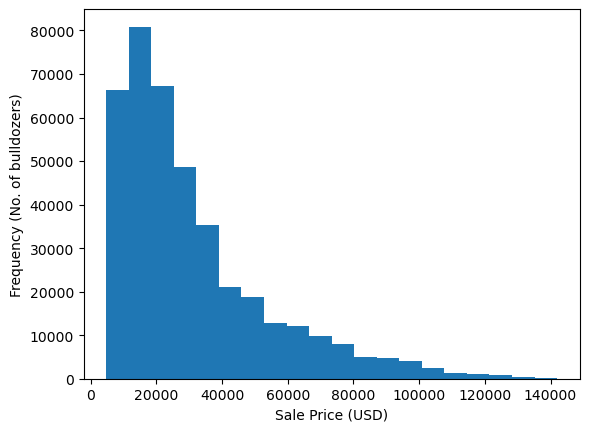

In [6]:
df["SalePrice"].plot.hist(
    xlabel="Sale Price (USD)",
    ylabel="Frequency (No. of bulldozers)",
    bins=20,
)

### Parsing dates in pandas

> Pandas datetime type makes it easy to extract date components from a datetime object.


In [7]:
df["saledate"][:5]

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
3     5/19/2011 0:00
4     7/23/2009 0:00
Name: saledate, dtype: object

In [8]:
df = pd.read_csv(
    bulldozer_dataset_path / "Train.csv", parse_dates=["saledate"], low_memory=False
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   SalePrice                 401125 non-null  int64         
 2   MachineID                 401125 non-null  int64         
 3   ModelID                   401125 non-null  int64         
 4   datasource                401125 non-null  int64         
 5   auctioneerID              380989 non-null  float64       
 6   YearMade                  401125 non-null  int64         
 7   MachineHoursCurrentMeter  142765 non-null  float64       
 8   UsageBand                 69639 non-null   object        
 9   saledate                  401125 non-null  datetime64[ns]
 10  fiModelDesc               401125 non-null  object        
 11  fiBaseModel               401125 non-null  object        
 12  fi

In [9]:
# Confirm that saledate is now a datetime type

df["saledate"][:5]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

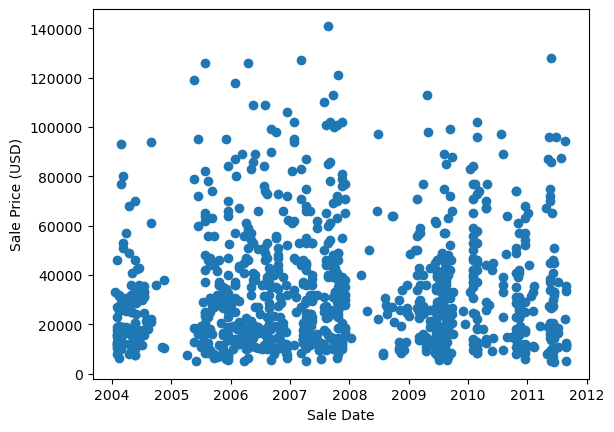

In [10]:
### Sale date vs sale price visualization
# df.plot.scatter(x="SalePrice", y="saledate", xlabel="Sale Price (USD)", ylabel="Sale Date") # Entire dataset 😅

fig, ax = plt.subplots()

ax.set_xlabel("Sale Date")
ax.set_ylabel("Sale Price (USD)")

ax.scatter(x=df["saledate"][:1000], y=df["SalePrice"][:1000])  # First 1000 data points

In [11]:
## Sort data by sale date

df.sort_values(by=["saledate"], inplace=True, ascending=True)

df["saledate"].head()

205615   1989-01-17
92803    1989-01-31
98346    1989-01-31
169297   1989-01-31
274835   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [12]:
# View last 5 rows of saledate column

df["saledate"].tail()

393123   2011-12-30
397987   2011-12-30
392664   2011-12-30
400458   2011-12-30
400217   2011-12-30
Name: saledate, dtype: datetime64[ns]

In [13]:
# Add datetime parameters for saledate
df["saleYear"] = df.saledate.dt.year
df["saleMonth"] = df.saledate.dt.month
df["saleDay"] = df.saledate.dt.day
df["saleDayofweek"] = df.saledate.dt.dayofweek
df["saleDayofyear"] = df.saledate.dt.dayofyear

# Drop original saledate column
df.drop("saledate", axis=1, inplace=True)

In [14]:
# View newly created columns
df[
    ["SalePrice", "saleYear", "saleMonth", "saleDay", "saleDayofweek", "saleDayofyear"]
].head()

,SalePrice,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
205615,9500,1989,1,17,1,17
92803,24000,1989,1,31,1,31
98346,35000,1989,1,31,1,31
169297,19000,1989,1,31,1,31
274835,14000,1989,1,31,1,31


[]

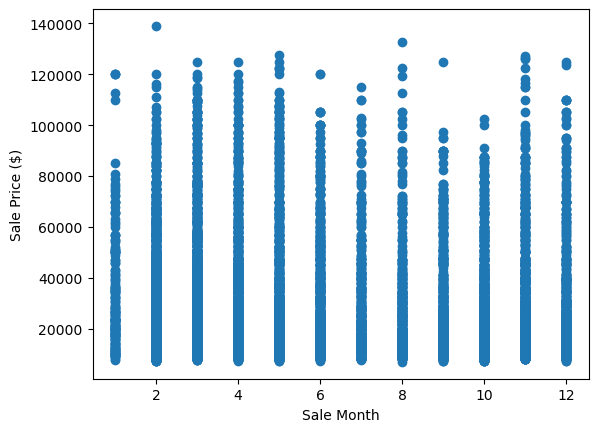

In [15]:
# View 10,000 samples SalePrice against saleMonth
fig, ax = plt.subplots()

ax.scatter(
    x=df["saleMonth"][:10000],  # visualize first 10k values
    y=df["SalePrice"][:10000],
)
ax.set_xlabel("Sale Month")
ax.set_ylabel("Sale Price ($)")
plt.plot()

[]

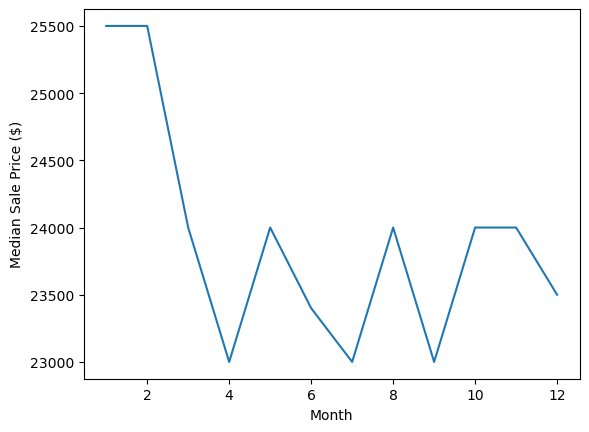

In [16]:
# Group DataFrame by saleMonth and then find the median SalePrice

df.groupby(["saleMonth"])["SalePrice"].median().plot(kind="line")
plt.xlabel("Month")
plt.ylabel("Median Sale Price ($)")
plt.plot()

In [17]:
# Count number of observations per state
df.state.value_counts()

state
Florida           63944
Texas             51682
California        29019
Washington        15955
Georgia           14309
Maryland          12965
Mississippi       12961
Ohio              12190
Colorado          11254
Illinois          11209
New Jersey        10882
North Carolina    10404
Tennessee         10027
Alabama            9997
Pennsylvania       9941
South Carolina     9794
Arizona            9173
New York           8604
Connecticut        8128
Minnesota          7734
Missouri           6961
Nevada             6693
Louisiana          6450
Kentucky           5278
Maine              5095
Indiana            4086
Arkansas           3869
New Mexico         3529
Utah               2895
Unspecified        2801
New Hampshire      2724
Wisconsin          2668
Virginia           2288
Idaho              2018
Oregon             1775
Michigan           1763
Wyoming            1662
Montana            1327
Oklahoma           1311
Iowa               1215
West Virginia       746
Nebraska  

In [18]:
# Median SalePrice (overall)
df["SalePrice"].median()

24000.0

In [19]:
# Median SalePrice (per state)
df.groupby(["state"])["SalePrice"].median()

state
Alabama           28000.0
Alaska            26000.0
Arizona           23000.0
Arkansas          22500.0
California        22500.0
Colorado          25000.0
Connecticut       23500.0
Delaware          23000.0
Florida           27000.0
Georgia           24000.0
Hawaii            26000.0
Idaho             21000.0
Illinois          22500.0
Indiana           19000.0
Iowa              24000.0
Kansas            20000.0
Kentucky          22000.0
Louisiana         23500.0
Maine             19500.0
Maryland          22000.0
Massachusetts     23000.0
Michigan          22000.0
Minnesota         19500.0
Mississippi       25000.0
Missouri          22000.0
Montana           24000.0
Nebraska          23250.0
Nevada            27000.0
New Hampshire     22750.0
New Jersey        24500.0
New Mexico        26000.0
New York          20000.0
North Carolina    25000.0
North Dakota      27250.0
Ohio              22000.0
Oklahoma          24000.0
Oregon            23000.0
Pennsylvania      19000.0
Puerto

[]

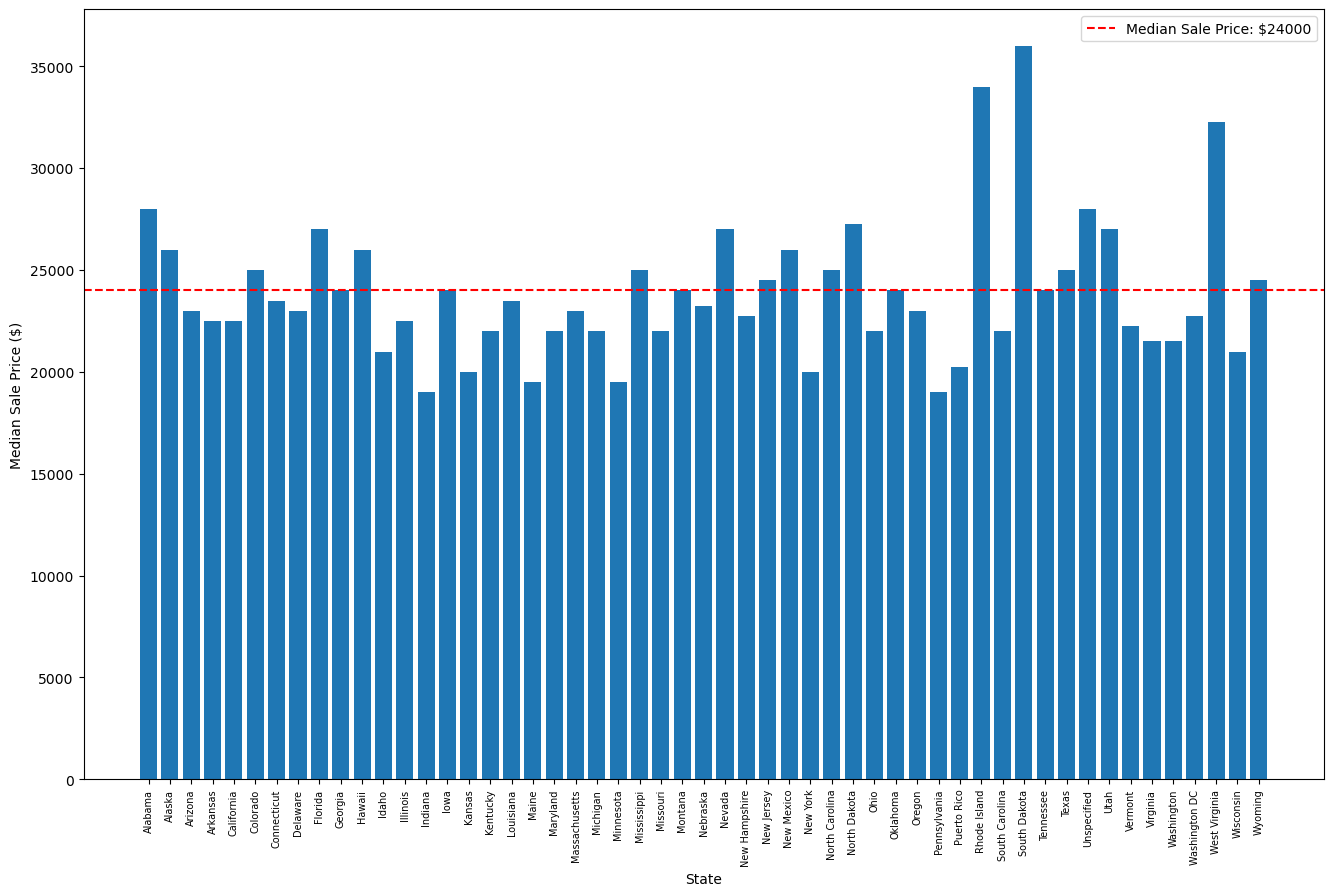

In [20]:
# Create a plot comparing median sale price per state to median sale price overall

median_prices_by_state = df.groupby(["state"])["SalePrice"].median()
median_sale_price = df["SalePrice"].median()

plt.figure(figsize=(16, 10))

plt.bar(
    x=median_prices_by_state.index,  # Because we're working with a Series, we can use the index (state names) as the x values
    height=median_prices_by_state.values,
)

plt.xlabel("State")
plt.ylabel("Median Sale Price ($)")

plt.xticks(rotation=90, fontsize=7)
plt.axhline(
    y=median_sale_price,
    color="red",
    linestyle="--",
    label=f"Median Sale Price: ${median_sale_price:.0f}",
)

plt.legend()
plt.plot()

## 3. Data cleaning and Preprocessing - Preparing for model training


In [21]:
# Check for missing values and different datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401125 entries, 205615 to 400217
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   fiModelDesc               401125 non-null  object 
 10  fiBaseModel               401125 non-null  object 
 11  fiSecondaryDesc           263934 non-null  object 
 12  fiModelSeries             56908 non-null   object 
 13  fiModelDescriptor         71919 non-null   o

In [22]:
# Find missing values (per column)
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension             375906
Blade_Width         

In [23]:
# Get the data type of a given column, say UsageBand
df["UsageBand"].dtype, df["UsageBand"].dtype.name

(dtype('O'), 'object')

### Using pd.api.types to get the data type of a given column


In [24]:
# Check whether a column is an object
pd.api.types.is_object_dtype(df["UsageBand"])

True

In [25]:
# Check whether a column is string
pd.api.types.is_string_dtype(df["UsageBand"]), pd.api.types.is_string_dtype(df["state"])

(False, True)

In [26]:
# Peek into a sample from a column
df["state"].sample(2)

51016           Arkansas
121370    South Carolina
Name: state, dtype: object

In [27]:
# Print column names and a sample data point of columns which contain strings

for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        # Check datatype of target column
        column_datatype = df[label].dtype.name

        # Get random sample from column values
        sample_val = content.sample(1).values

        # Infer random sample datatype
        sample_val_datatype = pd.api.types.infer_dtype(sample_val)
        print(
            f"Column name: {label} | Column dtype: {column_datatype} | Example value: {sample_val} | Example value dtype: {sample_val_datatype}"
        )

Column name: fiModelDesc | Column dtype: object | Example value: ['670CHII'] | Example value dtype: string
Column name: fiBaseModel | Column dtype: object | Example value: ['140'] | Example value dtype: string
Column name: fiProductClassDesc | Column dtype: object | Example value: ['Motorgrader - 130.0 to 145.0 Horsepower'] | Example value dtype: string
Column name: state | Column dtype: object | Example value: ['Texas'] | Example value dtype: string
Column name: ProductGroup | Column dtype: object | Example value: ['TTT'] | Example value dtype: string
Column name: ProductGroupDesc | Column dtype: object | Example value: ['Track Type Tractors'] | Example value dtype: string


#### Object columns


In [28]:
number_of_object_type_columns = 0

for label, content in df.items():
    # Check to see if column is of object type (this will include the string columns)
    if pd.api.types.is_object_dtype(content):
        column_datatype = df[label].dtype.name

        example_value = content.sample(1).values

        # Infer random sample datatype
        example_value_dtype = pd.api.types.infer_dtype(example_value)
        print(
            f"Column name: {label} | Column dtype: {column_datatype} | Example value: {example_value} | Example value dtype: {example_value_dtype}"
        )

        number_of_object_type_columns += 1

print(f"\n[INFO] Total number of object type columns: {number_of_object_type_columns}")

Column name: UsageBand | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: fiModelDesc | Column dtype: object | Example value: ['140HNA'] | Example value dtype: string
Column name: fiBaseModel | Column dtype: object | Example value: ['D5'] | Example value dtype: string
Column name: fiSecondaryDesc | Column dtype: object | Example value: ['C'] | Example value dtype: string
Column name: fiModelSeries | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: fiModelDescriptor | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: ProductSize | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: fiProductClassDesc | Column dtype: object | Example value: ['Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons'] | Example value dtype: string
Column name: state | Column dtype: object | Example value: ['Georgia'] | Example value dtype: string
Column name: ProductGr

#### Turning object values to categories using `Pandas`


In [29]:
for label, content in df.items():
    if pd.api.types.is_object_dtype(content):
        df[label] = df[label].astype("category")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401125 entries, 205615 to 400217
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   401125 non-null  int64   
 1   SalePrice                 401125 non-null  int64   
 2   MachineID                 401125 non-null  int64   
 3   ModelID                   401125 non-null  int64   
 4   datasource                401125 non-null  int64   
 5   auctioneerID              380989 non-null  float64 
 6   YearMade                  401125 non-null  int64   
 7   MachineHoursCurrentMeter  142765 non-null  float64 
 8   UsageBand                 69639 non-null   category
 9   fiModelDesc               401125 non-null  category
 10  fiBaseModel               401125 non-null  category
 11  fiSecondaryDesc           263934 non-null  category
 12  fiModelSeries             56908 non-null   category
 13  fiModelDescriptor         719

In [31]:
# Exploring a categorical column
df.state.dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=False, categories_dtype=object)

In [32]:
df.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [33]:
df.state.cat.codes

205615    43
92803      8
98346      8
169297     8
274835     8
          ..
393123    31
397987    31
392664    31
400458    31
400217    31
Length: 401125, dtype: int8

In [34]:
# Get example string using category number
sample_state_cat_num = 41

target_state_cat_value = df.state.cat.categories[sample_state_cat_num]

print(
    f"[INFO] Target state category number {sample_state_cat_num} maps to: {target_state_cat_value}"
)

[INFO] Target state category number 41 maps to: South Dakota


> CSV format fails to preserve the pandas category columns, so we can use another popular format like `parquet`. To use parquet, we need to install the `pyarrow` or `fastparquet` packages using `pip install pyarrow fastparquet`


In [35]:
df.to_parquet(
    path="data/bulldozer/Train_object_values_as_categories.parquet",
    engine="pyarrow",  # If "auto" option is used, it will automatically use pyarrow or fastparquet, defaulting to pyarrow first
)

In [36]:
# Read in df from parquet format
df = pd.read_parquet(
    "data/bulldozer/Train_object_values_as_categories.parquet", engine="pyarrow"
)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401125 entries, 205615 to 400217
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   401125 non-null  int64   
 1   SalePrice                 401125 non-null  int64   
 2   MachineID                 401125 non-null  int64   
 3   ModelID                   401125 non-null  int64   
 4   datasource                401125 non-null  int64   
 5   auctioneerID              380989 non-null  float64 
 6   YearMade                  401125 non-null  int64   
 7   MachineHoursCurrentMeter  142765 non-null  float64 
 8   UsageBand                 69639 non-null   category
 9   fiModelDesc               401125 non-null  category
 10  fiBaseModel               401125 non-null  category
 11  fiSecondaryDesc           263934 non-null  category
 12  fiModelSeries             56908 non-null   category
 13  fiModelDescriptor         719

In [38]:
# Check missing values
df.isna().sum().sort_values(ascending=False)[:20]

Blade_Width          375906
Engine_Horsepower    375906
Tip_Control          375906
Pushblock            375906
Blade_Extension      375906
Enclosure_Type       375906
Scarifier            375895
Hydraulics_Flow      357763
Grouser_Tracks       357763
Coupler_System       357667
fiModelSeries        344217
Steering_Controls    331756
Differential_Type    331714
UsageBand            331486
fiModelDescriptor    329206
Backhoe_Mounting     322453
Stick                321991
Turbocharged         321991
Pad_Type             321991
Blade_Type           321292
dtype: int64

#### Find numeric columns and fill (impute) missing values with median


In [39]:
# Find numeric columns
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        # Check datatype of target column
        column_datatype = df[label].dtype.name

        # Get random sample from column values
        example_value = content.sample(1).values

        # Infer random sample datatype
        example_value_dtype = pd.api.types.infer_dtype(example_value)
        print(
            f"Column name: {label} | Column dtype: {column_datatype} | Example value: {example_value} | Example value dtype: {example_value_dtype}"
        )

Column name: SalesID | Column dtype: int64 | Example value: [2275520] | Example value dtype: integer
Column name: SalePrice | Column dtype: int64 | Example value: [47000] | Example value dtype: integer
Column name: MachineID | Column dtype: int64 | Example value: [1325134] | Example value dtype: integer
Column name: ModelID | Column dtype: int64 | Example value: [266] | Example value dtype: integer
Column name: datasource | Column dtype: int64 | Example value: [132] | Example value dtype: integer
Column name: auctioneerID | Column dtype: float64 | Example value: [9.] | Example value dtype: floating
Column name: YearMade | Column dtype: int64 | Example value: [1000] | Example value dtype: integer
Column name: MachineHoursCurrentMeter | Column dtype: float64 | Example value: [nan] | Example value dtype: floating
Column name: saleYear | Column dtype: int32 | Example value: [1996] | Example value dtype: integer
Column name: saleMonth | Column dtype: int32 | Example value: [9] | Example val

In [40]:
# Check for which numeric columns have null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Column name: {label} | Has missing values: {True}")
        else:
            print(f"Column name: {label} | Has missing values: {False}")

Column name: SalesID | Has missing values: False
Column name: SalePrice | Has missing values: False
Column name: MachineID | Has missing values: False
Column name: ModelID | Has missing values: False
Column name: datasource | Has missing values: False
Column name: auctioneerID | Has missing values: True
Column name: YearMade | Has missing values: False
Column name: MachineHoursCurrentMeter | Has missing values: True
Column name: saleYear | Has missing values: False
Column name: saleMonth | Has missing values: False
Column name: saleDay | Has missing values: False
Column name: saleDayofweek | Has missing values: False
Column name: saleDayofyear | Has missing values: False


In [41]:
# Fill missing numeric values with the median of the target column
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():

            # Add a binary column which tells if the data was missing our not
            df[label + "_is_missing"] = pd.isnull(content).astype(
                int
            )  # this will add a 0 or 1 value to rows with missing values (e.g. 0 = not missing, 1 = missing)

            # Fill missing numeric values with median since it's more robust than the mean
            df[label] = content.fillna(content.median())

In [42]:
# Show rows where MachineHoursCurrentMeter_is_missing == 1
df[df["MachineHoursCurrentMeter_is_missing"] == 1].sample(4)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
149485,1522921,44000,1342516,3466,132,11.0,1997,0.0,NaN,312B,...,NaN,NaN,NaN,2001,1,25,3,25,0,1
82428,1381110,40000,173113,4128,132,1.0,1988,0.0,NaN,D6H,...,None or Unspecified,NaN,NaN,2001,3,13,1,72,0,1
34687,1270477,9500,1418949,3112,132,22.0,1993,0.0,NaN,1845C,...,NaN,NaN,NaN,2000,6,10,5,162,0,1
233370,1729257,9800,1162095,2253,132,9.0,1000,0.0,NaN,PC27R,...,NaN,NaN,NaN,2005,2,16,2,47,0,1


In [43]:
# Rows where auctioneerID_is_missing == 1
df[df["auctioneerID_is_missing"] == 1].sample(4)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
290227,2207815,23000,1750784,13251,136,2.0,1999,0.0,NaN,580SUPER LII,...,NaN,NaN,NaN,2007,12,5,2,339,1,0
302725,2247540,15500,1325834,7110,136,2.0,1987,0.0,NaN,416,...,NaN,NaN,NaN,2009,5,6,2,126,1,0
334289,2346667,42000,1658726,11390,136,2.0,2003,6044.0,High,160CLC,...,NaN,NaN,NaN,2007,12,12,2,346,1,0
340333,2356098,55000,1734792,22155,136,2.0,1000,0.0,NaN,650JLGP,...,None or Unspecified,NaN,NaN,2009,6,17,2,168,1,0


In [44]:
# Re-check for which numeric columns have null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Column name: {label} | Has missing values: {True}")
            break
else:
    print("[INFO] No numeric columns have missing values")

[INFO] No numeric columns have missing values


In [45]:
# Check to see how many examples in the auctioneerID were missing
df.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
0    380989
1     20136
Name: count, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401125 entries, 205615 to 400217
Data columns (total 59 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   SalesID                              401125 non-null  int64   
 1   SalePrice                            401125 non-null  int64   
 2   MachineID                            401125 non-null  int64   
 3   ModelID                              401125 non-null  int64   
 4   datasource                           401125 non-null  int64   
 5   auctioneerID                         401125 non-null  float64 
 6   YearMade                             401125 non-null  int64   
 7   MachineHoursCurrentMeter             401125 non-null  float64 
 8   UsageBand                            69639 non-null   category
 9   fiModelDesc                          401125 non-null  category
 10  fiBaseModel                          401125 non-null  category
 11  

#### Find non-numeric / object columns with missing values and fill them.


In [48]:
# Check columns which aren't numeric
print(f"[INFO] Columns which are not numeric: \n")

for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(f"Column name: {label} | Column dtype: {df[label].dtype.name}")

[INFO] Columns which are not numeric: 

Column name: UsageBand | Column dtype: category
Column name: fiModelDesc | Column dtype: category
Column name: fiBaseModel | Column dtype: category
Column name: fiSecondaryDesc | Column dtype: category
Column name: fiModelSeries | Column dtype: category
Column name: fiModelDescriptor | Column dtype: category
Column name: ProductSize | Column dtype: category
Column name: fiProductClassDesc | Column dtype: category
Column name: state | Column dtype: category
Column name: ProductGroup | Column dtype: category
Column name: ProductGroupDesc | Column dtype: category
Column name: Drive_System | Column dtype: category
Column name: Enclosure | Column dtype: category
Column name: Forks | Column dtype: category
Column name: Pad_Type | Column dtype: category
Column name: Ride_Control | Column dtype: category
Column name: Stick | Column dtype: category
Column name: Transmission | Column dtype: category
Column name: Turbocharged | Column dtype: category
Column

In [49]:
# 1. Create a dictionary to store column to category values (e.g. we turn our category types into numbers but we keep a record so we can go back)
column_to_category_dict = {}

# 2. Turn categorical variables into numbers
for label, content in df.items():

    # 3. Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):

        # 4. Add binary column to inidicate whether sample had missing value
        df[label + "_is_missing"] = pd.isnull(content).astype(int)

        # 5. Ensure content is categorical and get its category codes
        content_categories = pd.Categorical(content)
        content_category_codes = (
            content_categories.codes + 1
        )  # prevents -1 (the default for NaN values) from being used for missing values (we'll treat missing values as 0)

        # 6. Add column key to dictionary with code: category mapping per column
        column_to_category_dict[label] = dict(
            zip(content_category_codes, content_categories)
        )

        # 7. Set the column to the numerical values (the category code value)
        df[label] = content_category_codes

for k, v in column_to_category_dict.items():
    print(f"{k}: {v}")
    break

UsageBand: {np.int8(0): nan, np.int8(3): 'Medium', np.int8(2): 'Low', np.int8(1): 'High'}


In [50]:
# Observe UsageBand column
df["UsageBand"].unique()

array([0, 3, 2, 1], dtype=int8)

In [51]:
# Check the UsageBand (measure of bulldozer usage)
for key, value in sorted(
    column_to_category_dict["UsageBand"].items()
):  # note: calling sorted() on dictionary.items() sorts the dictionary by keys
    print(f"{key} -> {value}")

0 -> nan
1 -> High
2 -> Low
3 -> Medium


In [52]:
# Check the first 10 state column values
for key, value in sorted(column_to_category_dict["state"].items())[:10]:
    print(f"{key} -> {value}")

1 -> Alabama
2 -> Alaska
3 -> Arizona
4 -> Arkansas
5 -> California
6 -> Colorado
7 -> Connecticut
8 -> Delaware
9 -> Florida
10 -> Georgia


In [53]:
# Check total number of missing values
total_missing_values = df.isna().sum().sum()

if total_missing_values == 0:
    print(
        f"[INFO] Total missing values: {total_missing_values} - Great!  Let's build an ML model!"
    )
else:
    print(
        f"[INFO] Oh no! Total missing values: {total_missing_values} - Perhaps we might have to retrace our steps to fill the values?"
    )

[INFO] Total missing values: 0 - Great!  Let's build an ML model!


In [54]:
# Save preprocessed data with object values as categories as well as missing values filled
df.to_parquet(
    path="data/bulldozer/Train_object_values_as_categories_and_missing_values_filled.parquet",
    engine="pyarrow",
)

In [55]:
df = pd.read_parquet(
    path="data/bulldozer/Train_object_values_as_categories_and_missing_values_filled.parquet",
    engine="pyarrow",
)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401125 entries, 205615 to 400217
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: float64(2), int16(4), int32(5), int64(52), int8(40)
memory usage: 194.3 MB


In [57]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,401125.000000,401125.000000,4.011250e+05,401125.000000,401125.000000,...,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.327332,1899.156901,1.230726e+03,0.401942,1673.709485,...,0.751020,0.752651,0.752476,0.752651,0.752813,0.803872,0.800977,0.800975,0.826959,0.827064
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.575066,291.797469,1.654290e+04,0.930860,1263.331163,...,0.432423,0.431472,0.431574,0.431472,0.431377,0.397067,0.399266,0.399268,0.378283,0.378193
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00,0.000000,631.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00,0.000000,1395.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,0.000000e+00,0.000000,2292.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06,3.000000,4999.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,9500,1126363,8434,132,18.0,1974,0.0,0,4537,...,1,1,1,1,1,0,0,0,1,1
92803,1404019,24000,1169900,7110,132,99.0,1986,0.0,0,735,...,1,1,1,1,1,1,1,1,1,1
98346,1415646,35000,1262088,3357,132,99.0,1975,0.0,0,82,...,1,1,1,1,1,1,1,1,1,1
169297,1596358,19000,1433229,8247,132,99.0,1978,0.0,0,1158,...,1,1,1,1,1,1,1,1,0,0
274835,1821514,14000,1194089,10150,132,99.0,1980,0.0,0,1800,...,1,1,1,1,1,1,1,1,0,0


In [60]:
%%writefile "utils/eda.py"

def turn_object_values_to_categories(df: pd.DataFrame):
    for label, content in df.items():
        if pd.api.types.is_object_dtype(content):
            df[label] = df[label].astype("category")

    return df


def fill_missing_numeric_values(df: pd.DataFrame):
    """ Fill missing numeric values with the median of the target column """
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():

                # Add a binary column which tells if the data was missing our not
                df[label + "_is_missing"] = pd.isnull(content).astype(
                    int
                )  # this will add a 0 or 1 value to rows with missing values (e.g. 0 = not missing, 1 = missing)

                # Fill missing numeric values with median since it's more robust than the mean
                df[label] = content.fillna(content.median())

    return df


def convert_object_values_to_categories_and_fill_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    # 1. Create a dictionary to store column to category values (e.g. we turn our category types into numbers but we keep a record so we can go back)
    column_to_category_dict = {}

    # 2. Turn categorical variables into numbers
    for label, content in df.items():

        # 3. Check columns which *aren't* numeric
        if not pd.api.types.is_numeric_dtype(content):

            # 4. Add binary column to inidicate whether sample had missing value
            df[label + "_is_missing"] = pd.isnull(content).astype(int)

            # 5. Ensure content is categorical and get its category codes
            content_categories = pd.Categorical(content)
            content_category_codes = (
                content_categories.codes + 1
            )  # prevents -1 (the default for NaN values) from being used for missing values (we'll treat missing values as 0)

            # 6. Add column key to dictionary with code: category mapping per column
            column_to_category_dict[label] = dict(
                zip(content_category_codes, content_categories)
            )

            # 7. Set the column to the numerical values (the category code value)
            df[label] = content_category_codes

    return df

Overwriting utils/eda.py
